In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from utils.dotdict import dotdict
from utils.graph_generator import get_path
from scripts.launch_measure import init_graph, get_centrum

from src.params import GIRG_args1,GIRG_args2,GIRG_args3,GIRG_args4, get_moving

import seaborn as sn
import matplotlib.pyplot as plt
sn.set_theme(style="whitegrid")

In [2]:

def dist(k1,k2):
    return np.sqrt((k1[0]-k2[0])**2 + (k1[1]-k2[1])**2)

def plot_GIRG(graph, fig, ax):
    pos = nx.get_node_attributes(graph, "pos")
    
    # === Color nodes ===
    colors = {n:'red' for n in graph.nodes()}
    node_colors = [colors[n] for n in graph.nodes()]
    node_size = np.array([15*graph.degree[n]**0.6 for n in graph.nodes])
    edge_width = [dist(pos[u], pos[v]) for u,v in graph.edges]
    
    # === Draw nodes ===
    nx.draw_networkx_nodes(graph, pos=pos,node_size = node_size,alpha=0.8,
                           node_color=node_colors, ax=ax)
    # === Draw edges ===
    nx.draw_networkx_edges(graph, pos=pos,width = 3.0,
                           edge_color=edge_width,
                           edge_cmap = plt.cm.autumn,
                           edge_vmin = 0.0,
                           edge_vmax = 10,
                           style="solid",
                           alpha = 0.6,
                           connectionstyle=f'arc3,rad=0.9',
                           ax=ax)

    ax.set_facecolor('black')
    ax.axis('off')
    ax.set_title(r"GIRG $\tau$ = {} $\alpha$ = {}".format(GIRG_args["tau"], GIRG_args["alpha"]),
                 color="w", fontsize=30)

In [3]:
import copy
GIRG_args5 = GIRG_args1.copy()
GIRG_args5["alpha"]=1.3
GIRG_args5 = dotdict(GIRG_args5)

# 4 current equvalent class

Number of nodes:  944
Number of nodes:  988
Number of nodes:  991
Number of nodes:  975


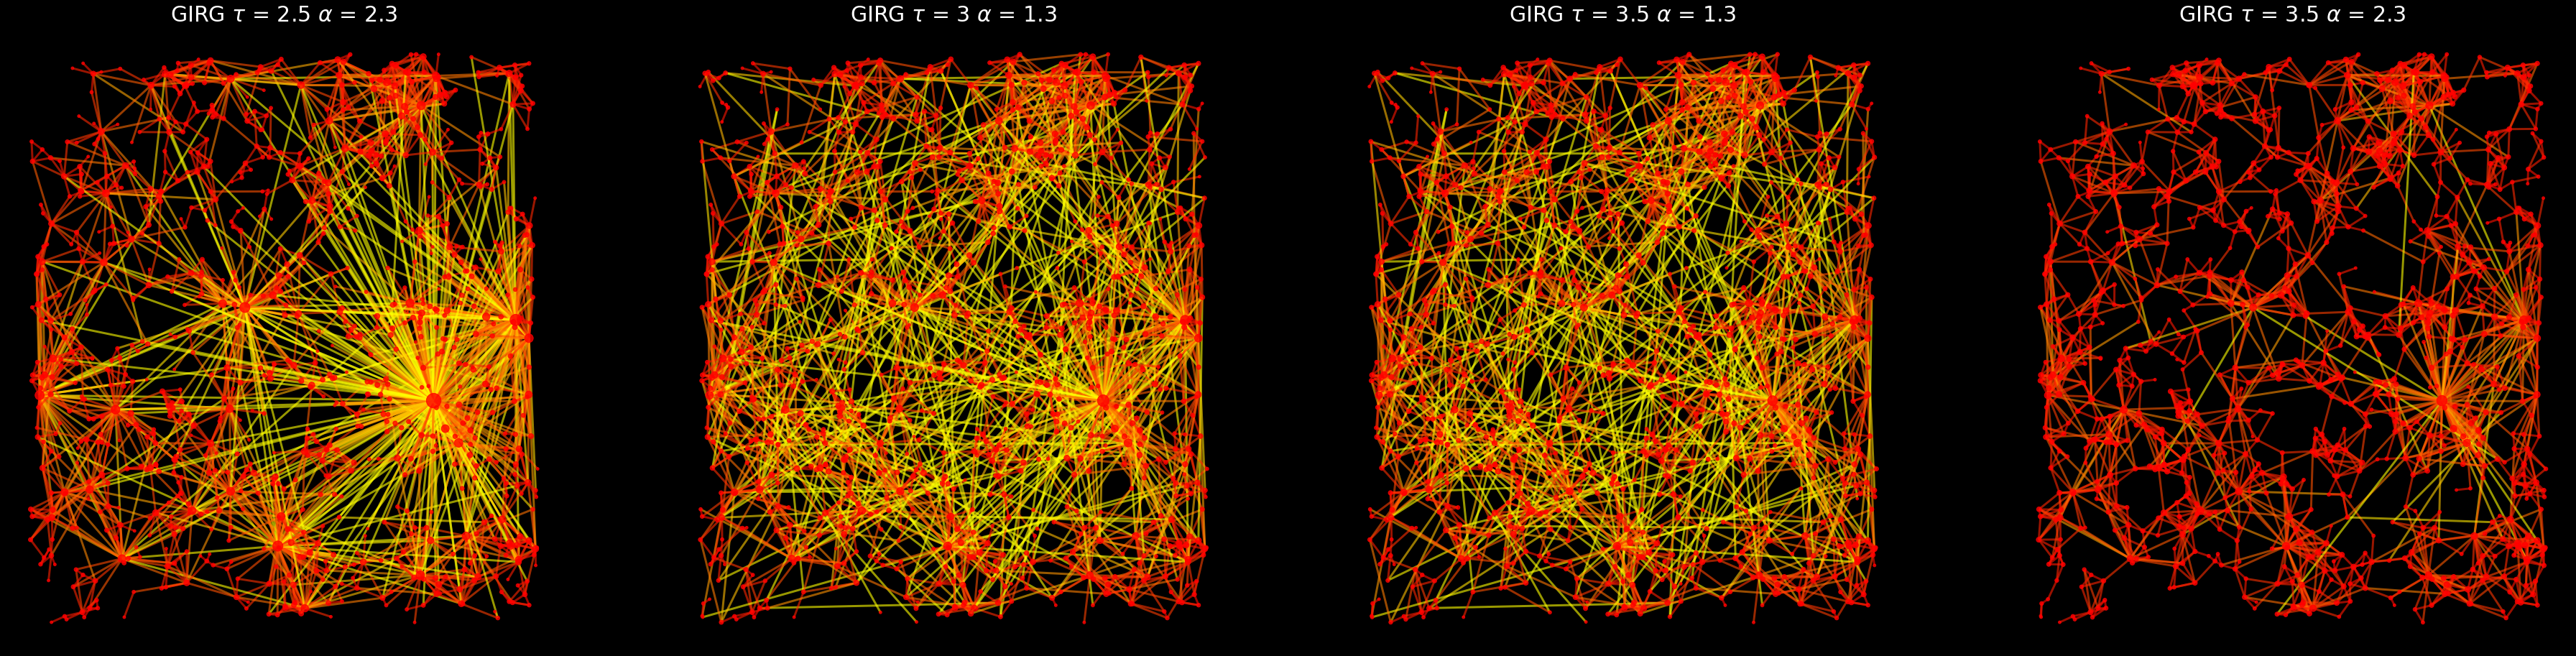

In [4]:
fig,axs = plt.subplots(1,4,figsize=(4*16,16))
fig.set_facecolor('black')

for GIRG_args,ax in zip([GIRG_args1,GIRG_args2,GIRG_args3,GIRG_args4],axs):
    graph = init_graph(GIRG_args)
    print("Number of nodes: ", len(graph.nodes))
    plot_GIRG(graph, fig,ax)
    
plt.show()

# $\tau$ and $\alpha$ comparison

Number of nodes:  966
Number of nodes:  944
Number of nodes:  991
Number of nodes:  975


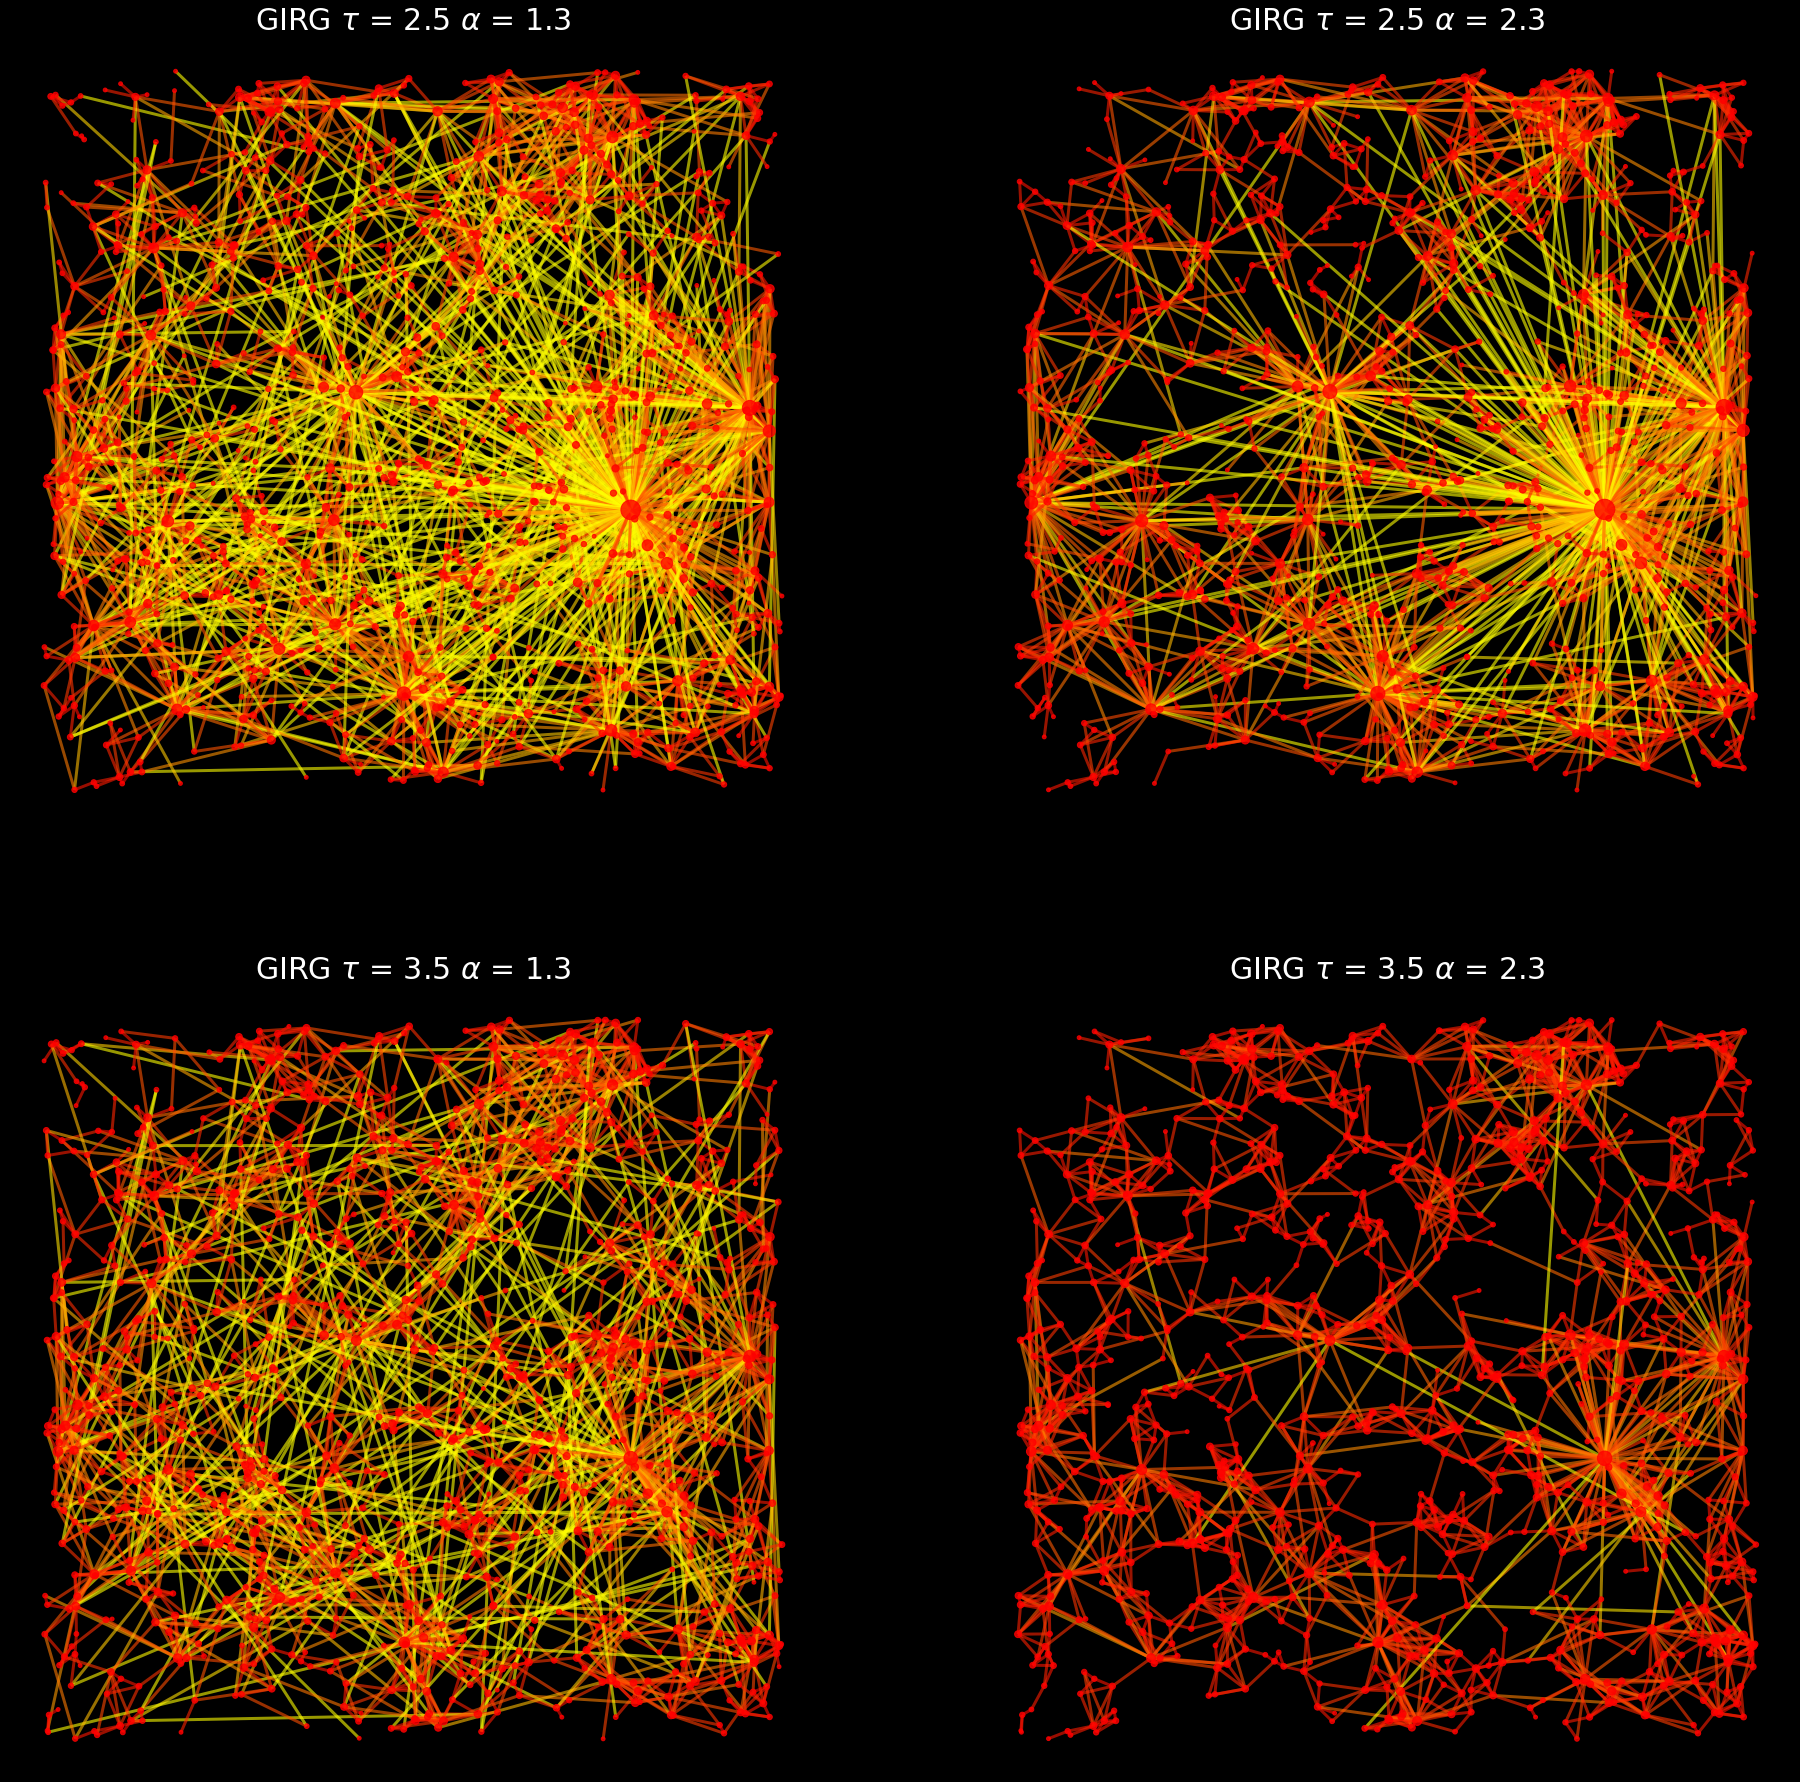

In [5]:
fig,axs = plt.subplots(2,2,figsize=(2*16,2*16))
fig.set_facecolor('black')

for GIRG_args,coord in zip([GIRG_args5,GIRG_args1,GIRG_args3,GIRG_args4],[[0,0],[0,1],[1,0],[1,1]]):
    graph = init_graph(GIRG_args)
    print("Number of nodes: ", len(graph.nodes))
    plot_GIRG(graph, fig,axs[coord[0]][coord[1]])
    
plt.show()